**AUTHOR:**  

Nabiel Husein Shihab / nabielshihab@hotmail.com

**REFERENCES**

NOTE: For educational purposes, some parts of this notebook are copied from said references. Thanks to them!

> - Watkins, H., Bond, C.E., Healy, D., Butler, R.B.H., 2015. Appraisal of Fracture Sampling Methods and a New Workflow to Characterise Heterogenous Fracture Networks at Outcrop. Journal of Structural Geology. 72, 67-82.
> - https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e
> - https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
> - https://cp-algorithms.com/geometry/circle-line-intersection.html

**NOTEBOOK DESCRIPTION**

Characterising fractures at outcrop for use as analogues to fractured reservoirs can use several methods. This notebook will show us how to perform **Mauldon Equation**, which is used in one of fracture sampling methods (**augmented circular scanline sampling method**), from an image. This notebook includes edge detection method (**Canny**) as well as point & line detection method using **Probability Hough Line Transform**. After we apply Canny & Hough Line Transform methods, we will define a circle and determine Mauldon parameters (m & n) that allow us to define fracture attributes.

# Advantages / Disadvantages of Each Sampling Method

> **- Linear Scanline Sampling**  
>> Advantage(s):  
>> - Allows a lot of fracture attribute data to be collected quickly.   
>> - More likely to capture fracture variations as they can cover longer tracts of outcrop and the position where each fracture intersects the scanline is recorded.

>> Disadvantage(s):  
>> - Creates length & orientation bias as well as sensitive to censoring.  
>> - Data are still in 1D, so variability in 2D and 3D is not captured.  
>> - May be biased by pre-interpretation of fracture sets.  
  
> **- Areal Sampling**  
>> Advantage(s):  
>> - Effective when mapping large-scale fractures & discontinuities.  
>> - Data collection in 2D.  
>> - Common method used for assessing fracture variablity across large-scale fractures / on larger outcrops.  
>> - Fast for collecting large amounts of data.  

>> Disadvantage(s):  
>> - Highly dependent on source-image data resolution, which causes data truncation, as smaller fractures are under-represented.  
>> - Quality control between photographs and outcrops is required, which can be time consuming.  


> **- Rectangular Window Sampling**  
>> Advantage(s):  
>> - Reduces orientation bias compared to linear scanline sampling method.   
>> - Allows for a simple estimation of mean trace lengths.  

>> Disadvantage(s):  
>> - Time consuming.  
>> - Data are also affected by censoring due to outcrop size and quality of exposure.  
    
> **- Circular Scanline Sampling**  
>> Advantage(s):  
>> - Not affected by length censoring.  
>> - Eliminates orientation bias.  
>> - Quick approach for collecting data.  
>> - Ideal for density, intensity, and mean trace length calculations where fractures are evenly distributed.  

>> Disadvantage(s):  
>> - The size of circle depends on fracture intensity at each sampling site.  
>> - Sampling would be restricted to larger outcrops.  
>> - Does not provide calculated estimates for orientation, length, aperture, spacing / fracture fill of fractures.  
>> - Does not give information on how fractures are distributed within the circle.  

> **- Augmented Circular Scanline Sampling** --> Combination of circular scanline method with methods used in linear scanline.
>> Advantage(s):  
>> - Eliminates orientation bias of bedding-perpendicular fractures.  
>> - Able to measure fracture orientation (strike, dip, and dip direction), length, aperture, fracture fill and spacing.  
>> - Fast for collecting data.  

>> Disadvantage(s):  
>> - Multiple surveys are needed to record fracture orientation variations on a large bedding surface.


# Brief Description About the Methods

## Canny Edge Detection

There are many different edge detection methods out there. Canny edge detector is probably the most commonly used and most effective method. These are the steps:    
1. Smooth the image with a Gaussian filter to reduce noise.
2. Compute gradient of using any of the gradient operators Sobel or Prewitt.
3. Extract edge points: Non-maximum suppression.
4. Linking and thresholding: Hysteresis

To make things easier we will be using **`OpenCV`** library.

## Hough Line Transform

The Hough Line Transform is a transform used to **detect straight lines**. To apply the Transform, first an edge detection pre-processing is desirable.  
As we know, a line in the image space can be expressed with two variables. In the **Polar coordinate system**: Parameters: $(r, \theta)$


In general for each point $(x_0,y_0)$, we can define the family of lines that goes through that point as:
> $r_\theta=x_0cos\theta+y_0sin\theta$

Meaning that each pair $(r_\theta,\theta)$ represents each line that passes by $(x_0,y_0)$. If for a given $(x_0,y_0)$ we plot the family of lines that goes through it, we get a sinusoid. Look at the example below:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# custom function
def r_theta_pairs(x, y):
    """
    create r-theta pairs related to a given coordinate. theta is between 0-30 with increment size of 0.1.
    """

    # empty list of r and theta
    r = []
    theta = []

    # create r-theta pairs. 
    for j in np.arange(0,360,0.1):
        r.append(x*np.cos(j) + y*np.sin(j))
        theta.append(j)
        
    return r, theta

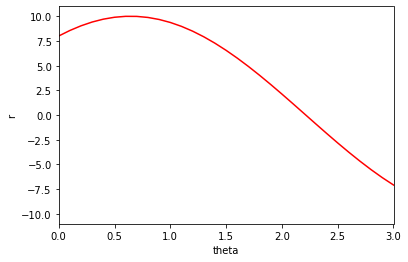

In [2]:
# create r-theta pairs for xo=8, yo=6. 
r, theta = r_theta_pairs(8, 6)

# visualize the r - theta space
plt.plot(theta,r, c='r')
plt.xlabel('theta')
plt.ylabel('r')
plt.xlim(0,3)
plt.show()

We can do the same operation above for all the points in an image. If the curves of two different points intersect in the plane $\theta-r$, that means that both points belong to a same line. For instance, following with the example above and drawing the plot for two more points: $x_1=4$, $y_1=9$ and $x_2=12$, $y_2=3$, we get:

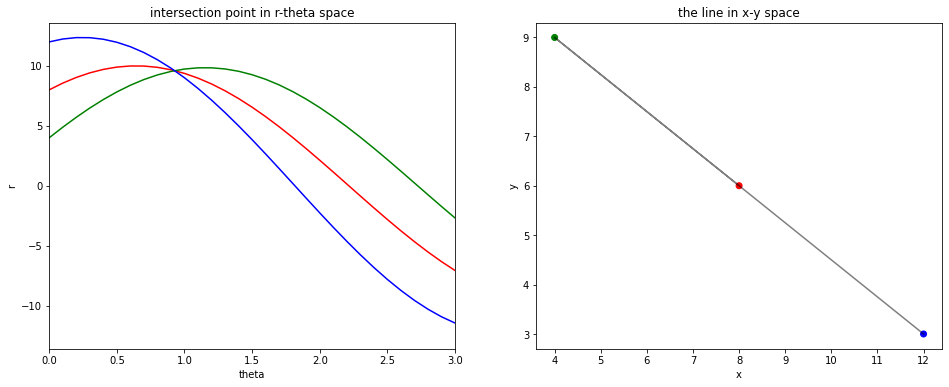

In [3]:
# create r-theta pairs for x1=4, y1=9. 
r1, theta1 = r_theta_pairs(4, 9)

# create r-theta pairs for x2=12, y2=3. 
r2, theta2 = r_theta_pairs(12, 3)

# visualize the r - theta space
fig, ax = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

ax[0].plot(theta,r, c='r')
ax[0].plot(theta1,r1, c='g')
ax[0].plot(theta2,r2, c='b')
ax[0].set_title('intersection point in r-theta space')
ax[0].set_xlabel('theta')
ax[0].set_ylabel('r')
ax[0].set_xlim(0,3)

# visualize the x - y space
ax[1].plot([8,4,12], [6,9,3], c='k', alpha=0.5)
ax[1].scatter([8,4,12], [6,9,3], c=['r', 'g', 'b'])
ax[1].set_title('the line in x-y space')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

The three plots intersect in one single point $(0.925,9.6)$, these coordinates are the parameters $(\theta,r)$ or the line in which $(x0,y0)$, $(x1,y1)$ and $(x2,y2)$ lay. It means that a line can be detected by finding the number of intersections between curves.The more curves intersecting means that the line represented by that intersection have more points. In general, we can define a threshold of the minimum number of intersections needed to detect a line. **This is what the Hough Line Transform does. It keeps track of the intersection between curves of every point in the image. If the number of intersections is above some threshold, then it declares it as a line with the parameters** $(\theta,r\theta)$ **of the intersection point.**

## Mauldon Equation

The circular scanline sampling method of Mauldon et al. is used to count the number of fracture intersections with the edge of the circle ($n$) and the number of fracture terminations within the circle ($m$). These values are then inputted into a series of equations (Mauldon et al. 2001). This Mauldon equation is used to estimate values of fracture intensity: 

> $I = n/4r$  

where,  
$I$ = intensity (m/m^2)  
$n$ = number of fracture intersections with the circle  
$r$ = circle radius (m), based on minimum *m* count (30).  
  
The circular scanline strategy by Mauldon et al. (2001) offers a method for estimating average trae length within the circle area without having to measure individual fractures. This estimator can be applied to outcrops that contain a large number of fractures that are longer than the size of the outcrop itself. The method does not give information about individual fracture lengths, but rather counts $n$ and $m$ points to yield a mean fracture tracelength using the following equation:

> $\mu = (\pi r/2)(n/m)$  

where, 
$\mu$ = mean trace length (m)  
$n$ = number of fracture intersections with the circle  
$r$ = circle radius (m), based on minimum *m* count (30)    
$m$ = number of terminations within the circle  

# Explanation about The Data (Image)

fractured stone image from local directory

# Let's Code

## Import Packages/Libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import math
from sympy import symbols, Eq, solve

plt.style.use('seaborn-white')
plt.rcParams["font.size"] = "12"
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

## Custom Functions

In [5]:
def euclidean_distance(x1,y1,x2,y2):
    """
    calculate the euclidean distance between 2 points
    
    Parameters
    ----------
    x1, y1 : {float} coordinate of first point
    x2, y2 : {float} coordinate of second point
    
    Returns
    -------
    {float} euclidean distance 
    
    """
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [6]:
def eq_coeff(x1,y1,x2,y2):
    """
    Construct a line equation (Ax+By+C=0) from 2 points and extract its coefficients.
    
    Parameters
    ----------
    x1, y1 : {float} coordinate of first point
    x2, y2 : {float} coordinate of second point
    
    Returns
    -------
    A : {float} coefficient of x 
    B : {float} coefficient of y
    C : {float} constant    
    """
    # defining symbols used in equations or unknown variables
    x, y = symbols('x y')
    
    # check if line is vertical or not 
    # if vertical (gradient = infinity)
    if x1 == x2:
        A = 1
        B = 0
        C = -x1
        
    else:
        # gradient & intercept
        m = (y2-y1)/(x2-x1)
        
        A = -m
        B = 1
        C = -1*(y1-m*x1)
                
    return A, B, C

def line_angle(x1,y1,x2,y2):
    """
    Calculate angle from a vertical vector. 
    vertical vector = [0, -1] --> Downward since pixel indexing is reversed.
    
    Parameters
    ----------
    x1, y1 : {float} coordinate of first point
    x2, y2 : {float} coordinate of second point
    
    Returns
    theta: {float} angle between a vector and vertical vector    
    """
    
    # define vertical vector
    vertical = np.array([0, -1])
        
    # create a vector from 2 coordinate points. shift (x1,y1) to origin.
    line_vector = np.array([x2-x1, y2-y1])

    cos_theta = line_vector.dot(vertical) / (np.linalg.norm(line_vector) * np.linalg.norm(vertical))
    theta = math.degrees(np.arccos(cos_theta))

    if x2-x1 < 0:
        theta = 360 - theta
    
    return theta
    

def intersections(A,B,C,r):
    """
    Find the coordinate points of intersection.
    Given the radius (r) of a circle and the coefficients of an equation of a line (Ax+By+C=0).
    Assumption: the circle is centered at the origin.

    Parameters
    -------
    A : {float} coefficient of x 
    B : {float} coefficient of y
    C : {float} constant
    r : {float} radius of a cirle
    
    Returns
    -------
    x_intersect1, y_intersect1 : {float} coordinate of first intersection point 
    x_intersect2, y_intersect2 : {float} coordinate of second intersection point 
    
    """
    # smallest distance between center of a circle and a line
    d0 = abs(C) / np.sqrt(A**2 + B**2)
    
    # coordinate points of the closest point
    x0 = -1*(A*C) / (A**2 + B**2)
    y0 = -1*(B*C) / (A**2 + B**2)
    
    if d0 > r:
        # number of intersection points = 0
        x_intersect1 = y_intersect1 = x_intersect2 = y_intersect2 = np.nan
    elif d0 == r:
        # number of intersection points = 1
        x_intersect1, y_intersect1 = x_intersect2, y_intersect2 = x0, y0
    elif d0 < r:
        # number of intersection points = 2
        d = np.sqrt(r**2 - (C**2 / (A**2 + B**2)))
        m = np.sqrt(d**2 / (A**2 + B**2))
        x_intersect1, y_intersect1 = x0 + B*m, y0 - A*m
        x_intersect2, y_intersect2 = x0 - B*m, y0 + A*m
    
    return x_intersect1, y_intersect1, x_intersect2, y_intersect2


def store2df(df, line_id, x, y, angle):
    """
    store coordinate point (x,y), id of a line (line_id), and angle of a line from vertical axis (angle) to dataframe (df).
    format : 3 decimal points
    
    Parameters
    ----------
    df : {DataFrame} Appendable Dataframe
    line_id : {int} line ID
    x, y: {float} coordinate point
    angle : {float} angle of the line from vertical axis
    
    Return
    ------
    df : {DataFrame} Appended Dataframe
    
    """
    idx = len(df.index)
    df.loc[idx, 'id'] = line_id 
    df.loc[idx, 'x'] = round(x,3) 
    df.loc[idx, 'y'] = round(y,3) 
    df.loc[idx, 'angle'] = round(angle,3) 
    
    return df

In [7]:
def plot_rose(strikes, title='Rose Diagram', ax=None, **kwargs):
    """
    Plot a Rose Diagram to show the distributions of directional data!
    
    Parameters
    ----------
    strikes : {array} an array of strike values
    title : {str} plot title, default = 'Rose Diagram'
    ax: {None/ax} referenced axes 

    """

    # check axes availability
    if ax != None:
        ax = ax
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='polar')

    # create strikes histogram
    bin_width = 10
    bin_edges = np.arange(-5, 365+bin_width, bin_width)
    num_strikes, bin_edges = np.histogram(strikes, bin_edges)
    
    # sum the first strike with the last one since they are overlapping
    num_strikes[0] += num_strikes[-1]
    
    # mirroring
    half = np.sum(np.split(num_strikes[:-1], 2), 0)
    two_halves = np.concatenate([half, half])
    
    # Rose Diagram plot
    x_ticks = np.arange(0, 360, bin_width)
    ax.bar(np.deg2rad(x_ticks), 
           two_halves, 
           width=np.deg2rad(10), 
           bottom=0.0,
           **kwargs)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_thetagrids(x_ticks, labels=x_ticks)
    ax.set_title(title)
    


## Load Image

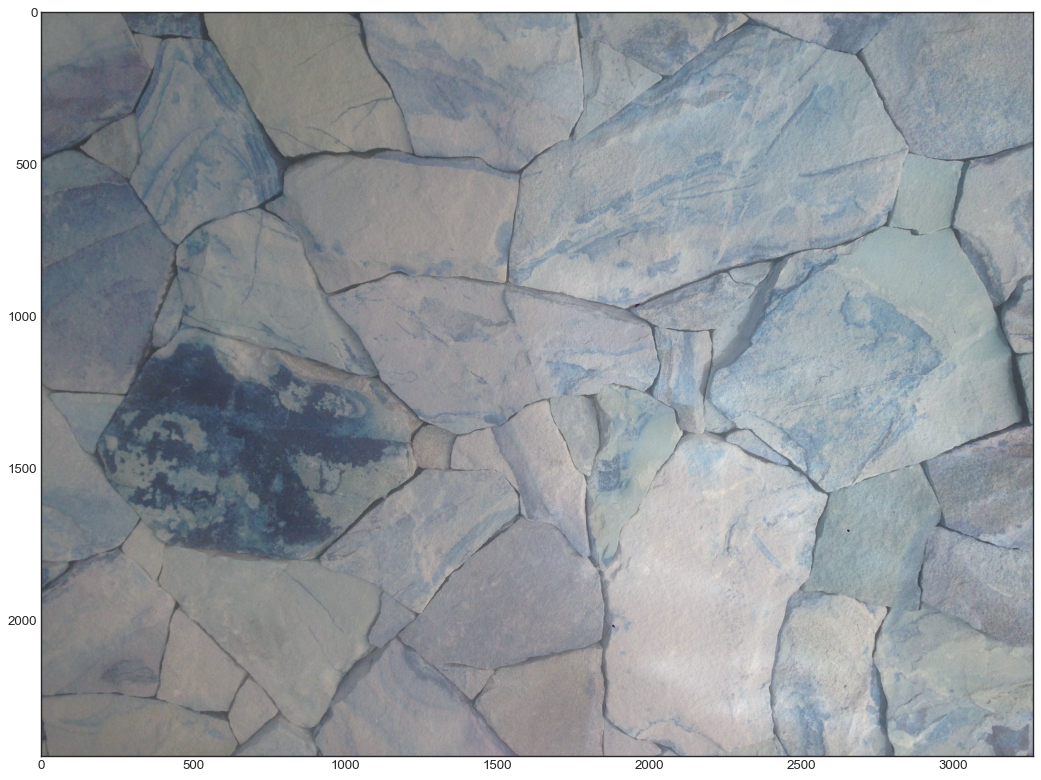

In [8]:
# read image
img = cv2.imread('figures/fractures.jpg')

# plot edges
plt.figure(figsize=(16,32))
plt.imshow(img)
plt.show()

## Canny Edge Detection

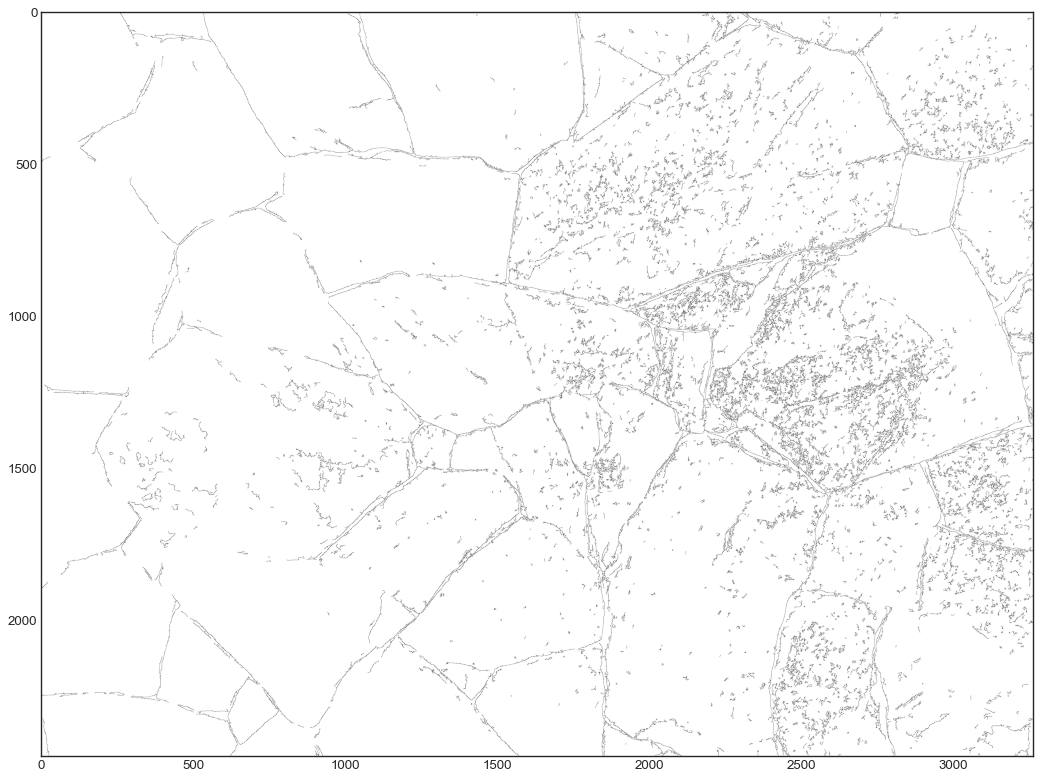

In [9]:
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply Canny edge detection method
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

# plot edges
plt.figure(figsize=(16,32))
plt.imshow(edges)
# plt.show()

# plt.savefig('figures/fractures/canny.png', bbox_inches='tight')

## Probability Hough Line Transform

In [10]:
lines = cv2.HoughLinesP(image=edges, 
                        rho=1, 
                        theta=np.pi/180,
                        threshold=5,
                        minLineLength=15,
                        maxLineGap=5)

In [11]:
lines = np.reshape(lines, (lines.shape[0],4))

df_lines = pd.DataFrame({
    'id': range(1, lines.shape[0]+1),
    'x1': lines[:,0],
    'y1': lines[:,1],
    'x2': lines[:,2],
    'y2': lines[:,3],
})

df_lines['length'] = euclidean_distance(df_lines['x1'],df_lines['y1'],df_lines['x2'],df_lines['y2'])

df_lines.head()

,id,x1,y1,x2,y2,length
0,1,2939,336,2954,323,19.849433
1,2,2246,915,2263,925,19.723083
2,3,1411,1795,1434,1776,29.832868
3,4,2134,960,2159,947,28.178006
4,5,2463,1402,2466,1425,23.194827


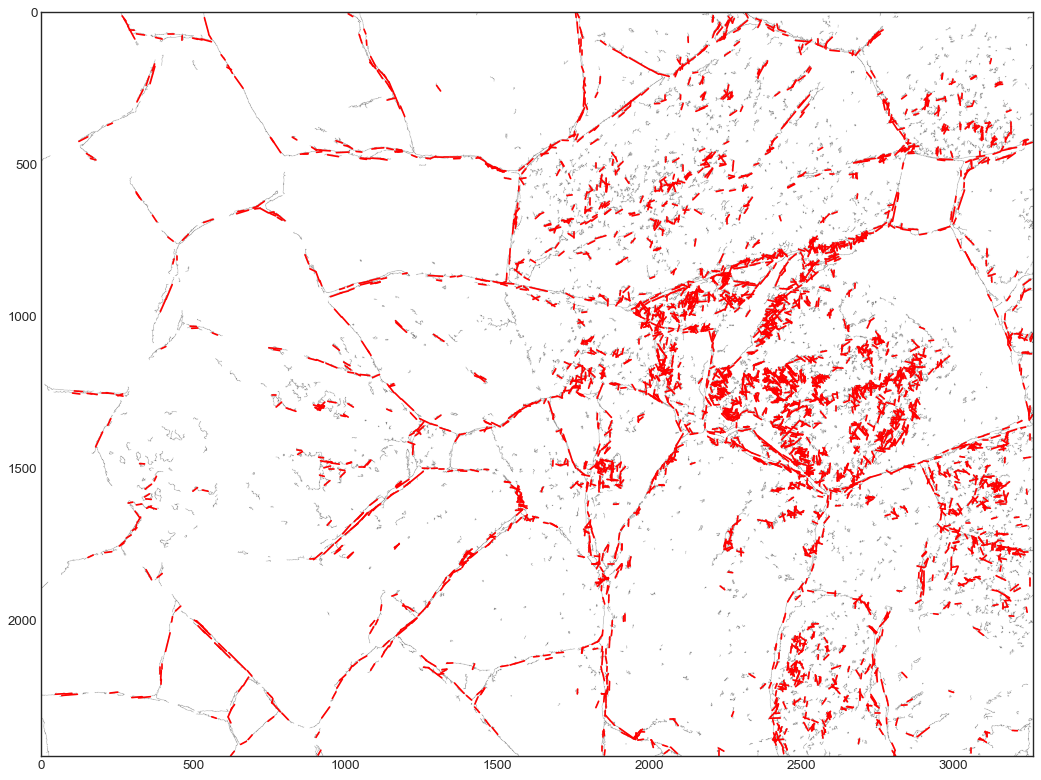

In [12]:
fig, ax = plt.subplots(figsize=(16,31))

# image
ax.imshow(edges)

# detected lines
for i in df_lines.index:
    ax.plot([df_lines['x1'][i],df_lines['x2'][i]], [df_lines['y1'][i],df_lines['y2'][i]], label=df_lines['id'][i], c='r')

## Mauldon Equation

### Define the Circle

In [13]:
# radius and center point of the circle
r = 500
a, b = 1200, 1250

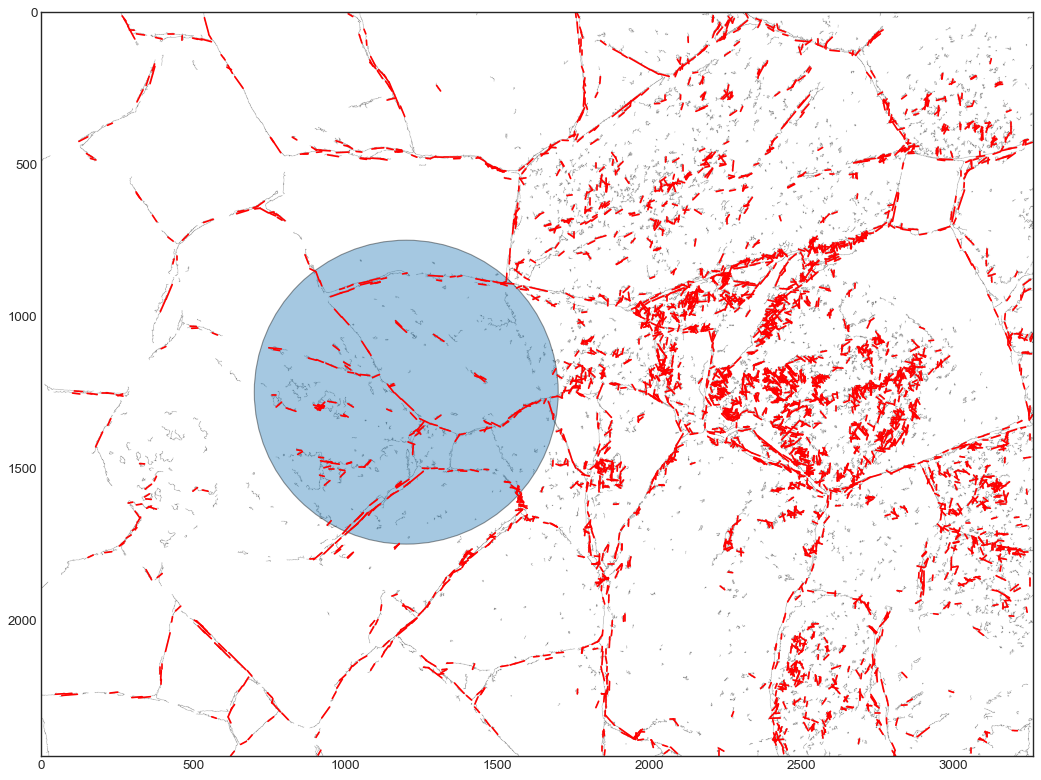

In [14]:
fig, ax = plt.subplots(figsize=(16,31))

# image
ax.imshow(edges)

# detected lines
for i in df_lines.index:
    ax.plot([df_lines['x1'][i],df_lines['x2'][i]], [df_lines['y1'][i],df_lines['y2'][i]], label=df_lines['id'][i], c='r')

# circle
circle = plt.Circle((a,b), r, edgecolor='k', fill=True, alpha=0.4)
ax.add_artist( circle )  
plt.show()


### Calculate $m$-value

In [15]:
# create a dataframe for endpoints
df_end1 = df_lines[['id', 'x1', 'y1']]
df_end1.columns = ['id', 'x', 'y']

df_end2 = df_lines[['id', 'x2', 'y2']]
df_end2.columns = ['id', 'x', 'y']

df_endpoints = df_end1.append(df_end2).sort_values(by='id').reset_index(drop=True)

# distance between center point of the circle and ending points of the lines
df_endpoints['d'] = euclidean_distance(a, b, df_endpoints['x'], df_endpoints['y'])
df_endpoints.head()

,id,x,y,d
0,1,2939,336,1964.565346
1,1,2954,323,1983.896419
2,2,2246,915,1098.335559
3,2,2263,925,1111.572760
4,3,1411,1795,584.419370


In [16]:
# select points within circle
df_inside = df_endpoints[(df_endpoints['d'] < r)] 
df_inside.head()

,id,x,y,d
110,56,1616,1285,417.469759
111,56,1576,1309,380.600841
120,61,1532,900,482.414759
121,61,1511,893,473.465944
138,70,1642,1276,442.764046


In [17]:
# m-value
m = df_inside.shape[0]
print(f"m-value = {m}")

m-value = 320


### Calculate $n$-value

In [18]:
# empty df for line orientation
df_intersections = pd.DataFrame(columns=['id', 'x', 'y', 'angle'])

# get termination points
for i in df_lines.index:

    # shift line endpoints based on the center of the circle.
    # when determining the intersection points, the center of the circle is assumed to be at the origin (0,0) 
    x1, y1 = df_lines['x1'][i]-a, df_lines['y1'][i]-b
    x2, y2 = df_lines['x2'][i]-a, df_lines['y2'][i]-b

    # coefficients and angle of a line equation
    A, B, C = eq_coeff(x1,y1,x2,y2)
    angle = line_angle(x1,y1,x2,y2)

    # intersection points
    x_intersect1, y_intersect1, x_intersect2, y_intersect2 = intersections(A,B,C,r)

    # shift endpoints and intersection points to their original coordinates
    x1 = x1 + a
    y1 = y1 + b
    x2 = x2 + a
    y2 = y2 + b
    x_intersect1 = x_intersect1 + a
    y_intersect1 = y_intersect1 + b
    x_intersect2 = x_intersect2 + a
    y_intersect2 = y_intersect2 + b

    # select which point that is on the line and store it to dataframe
    half_line = df_lines['length'][i] / 2
    x_midpoint, y_midpoint = (x2+x1)/2, (y2+y1)/2

    if x_intersect1 == np.nan:
        # zero intersection point --> continue to next iteration
        continue

    elif (x_intersect1, y_intersect1) == (x_intersect2, y_intersect2):
        # one intersection point --> check if the intersection point is on the line & store to dataframe
        is_intersect1 = euclidean_distance(x_midpoint, y_midpoint, x_intersect1, y_intersect1) <= half_line
        
        if is_intersect1:
            df_intersections = store2df(df_intersections, 
                                        df_lines['id'][i],
                                        x_intersect1, 
                                        y_intersect1,
                                        angle)
    else:
        # two intersection points --> select which point that is on the line and store it to dataframe
        is_intersect1 = euclidean_distance(x_midpoint, y_midpoint, x_intersect1, y_intersect1) <= half_line
        is_intersect2 = euclidean_distance(x_midpoint, y_midpoint, x_intersect2, y_intersect2) <= half_line

        if is_intersect1:
            df_intersections = store2df(df_intersections, 
                                        df_lines['id'][i],
                                        x_intersect1, 
                                        y_intersect1,
                                        angle)
            
        if is_intersect2:
            df_intersections = store2df(df_intersections, 
                                        df_lines['id'][i],
                                        x_intersect2, 
                                        y_intersect2,
                                        angle)
            
df_intersections

,id,x,y,angle
0,122,1567.241,1589.314,138.945
1,593,1006.938,1711.224,49.514
2,764,1175.821,1749.415,39.806
3,1004,1699.804,1263.99,109.44
4,1020,1550.8,893.714,95.102
5,1127,946.229,1680.813,40.914
6,2307,998.341,1707.53,40.914
7,2322,1563.592,906.778,69.444
8,2535,1530.29,874.622,2.603
9,2575,898.327,851.26,115.346


In [19]:
# n-value
n = df_intersections.shape[0]
print(f"n-value = {n}")

n-value = 10


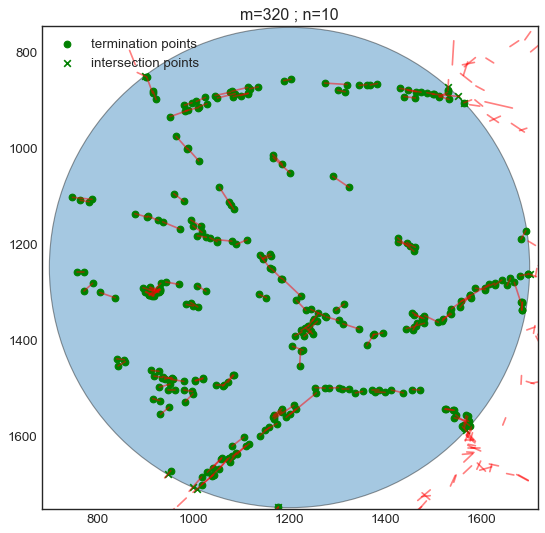

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

# detected lines
ax.set_title(f'm={m} ; n={n}')
for i in df_lines.index:
    ax.plot([df_lines['x1'][i],df_lines['x2'][i]], [df_lines['y1'][i],df_lines['y2'][i]], alpha=0.5, c='r')

# circle
circle = plt.Circle((a,b), r, edgecolor='k', fill=True, alpha=0.4)
ax.add_artist( circle )    

# termination points within circle (m)
ax.scatter(df_inside['x'], df_inside['y'], c='g', label='termination points')

# intersection points (n)
ax.scatter(df_intersections['x'],df_intersections['y'], marker='x', c='g', label='intersection points')


ax.axis('equal')
ax.set_xlim(a-r-3, a+r+3)
ax.set_ylim(b-r-3, b+r+3)
ax.invert_yaxis()
plt.legend(loc='upper left', shadow=True)
plt.show()

### Fracture Attributes

In [21]:
# fracture intensity
I = n/(4*r)

# mean trace length
mu = round((np.pi*r)*(n/m), 2)

print(f'Fracture intensity = {I} \nMean Trace Length = {mu}')

Fracture intensity = 0.005 
Mean Trace Length = 49.09


In [22]:
# angle details (from vertical axis)
df_intersections['angle'].astype('float').describe()

count     10.00000
mean      70.20280
std       42.89638
min        2.60300
25%       40.91400
50%       59.47900
75%      105.85550
max      138.94500
Name: angle, dtype: float64

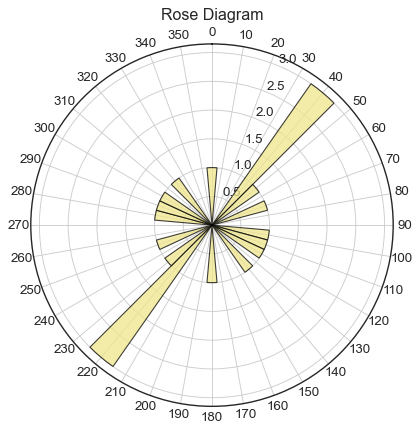

In [23]:
# Rose Diagram
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='polar')
plot_rose(df_intersections['angle'], color='khaki', edgecolor='k', alpha=.75, ax=ax)